In [13]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import concatenate
from math import sqrt


Using TensorFlow backend.
c:\users\chengong\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\chengong\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\chengong\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

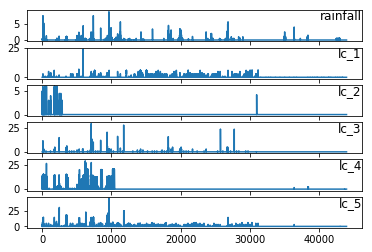

In [59]:
import pandas as pd
from matplotlib import pyplot
# load dataset
dataset = pd.read_excel('数据驱动原始数据.xlsx', sheet_name = 3)
values = dataset.values
# specify columns to plot
groups = [ 1, 2, 3 ,4, 5, 6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()


In [66]:
#values = reframed.values

train = values[:26425, :]
test = values[26425:, :]
# split into input and outputs
train_X, train_y = train[:,1], train[:, 6]
test_X, test_y = test[:, 1], test[:, 6]
# reshape input to be 3D [samples, timesteps, features]


train_X = train_X.reshape((train_X.shape[0], 1, 1))
test_X = test_X.reshape((test_X.shape[0], 1, 1))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(26425, 1, 1) (26425,) (17567, 1, 1) (17567,)


Train on 26425 samples, validate on 17567 samples
Epoch 1/25
 - 4s - loss: 0.3815 - val_loss: 0.0480
Epoch 2/25
 - 1s - loss: 0.3809 - val_loss: 0.0483
Epoch 3/25
 - 1s - loss: 0.3807 - val_loss: 0.0485
Epoch 4/25
 - 1s - loss: 0.3807 - val_loss: 0.0488
Epoch 5/25
 - 1s - loss: 0.3806 - val_loss: 0.0484
Epoch 6/25
 - 1s - loss: 0.3806 - val_loss: 0.0482
Epoch 7/25
 - 1s - loss: 0.3805 - val_loss: 0.0481
Epoch 8/25
 - 1s - loss: 0.3804 - val_loss: 0.0484
Epoch 9/25
 - 1s - loss: 0.3804 - val_loss: 0.0484
Epoch 10/25
 - 1s - loss: 0.3805 - val_loss: 0.0482
Epoch 11/25
 - 1s - loss: 0.3804 - val_loss: 0.0480
Epoch 12/25
 - 1s - loss: 0.3804 - val_loss: 0.0487
Epoch 13/25
 - 1s - loss: 0.3803 - val_loss: 0.0483
Epoch 14/25
 - 1s - loss: 0.3803 - val_loss: 0.0481
Epoch 15/25
 - 1s - loss: 0.3803 - val_loss: 0.0484
Epoch 16/25
 - 1s - loss: 0.3803 - val_loss: 0.0485
Epoch 17/25
 - 1s - loss: 0.3803 - val_loss: 0.0481
Epoch 18/25
 - 1s - loss: 0.3802 - val_loss: 0.0480
Epoch 19/25
 - 1s - los

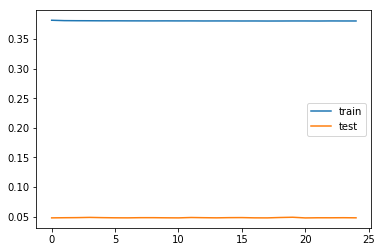

In [67]:
# design network
model = Sequential()
model.add(LSTM(350, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=25, batch_size=200, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 

In [68]:

yhat = model.predict(test_X)

for i in range(len(test_X)):
    print(yhat[i][0],test_y[i])

rmse = sqrt(mean_squared_error(yhat, test_y))
print(rmse)
print('Test RMSE: %.3f' % rmse)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)


-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.000241388

-0.00024138817 3.0
-0.00024138817 0.0
-0.00024138817 3.0
-0.00024138817 0.0
-0.00024138817 3.0
-0.00024138817 0.0
-0.00024138817 3.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 2.0
-0.00024138817 0.0
-0.00024138817 3.0
-0.00024138817 0.0
-0.00024138817 3.0
-0.00024138817 0.0
-0.00024138817 3.0
-0.00024138817 0.0
-0.00024138817 3.0
-0.00024138817 3.0
-0.00024138817 0.0
-0.00024138817 3.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.000241388

-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.000241388

-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.000241388

-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.000241388

-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.000241388

-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.000241388

-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.000241388

-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.000241388

-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.00024138817 0.0
-0.000241388